In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install kagglehub
import kagglehub

path = kagglehub.dataset_download("anandshaw2001/amazon-product-sales-2025")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ap920\.cache\kagglehub\datasets\anandshaw2001\amazon-product-sales-2025\versions\1


In [2]:
path

'C:\\Users\\ap920\\.cache\\kagglehub\\datasets\\anandshaw2001\\amazon-product-sales-2025\\versions\\1'

In [3]:
Amazon = pd.read_csv("amazon_sales_2025_INR.csv") 

In [4]:
Amazon.head()

,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State,Country
0,ORD100000,2025-01-25,CUST2796,Home & Kitchen,Cookware Set,2,25574.41,51148.82,Credit Card,Returned,1,Waste of money,Sikkim,India
1,ORD100001,2025-08-28,CUST9669,Beauty,Hair Dryer,1,19361.41,19361.41,Debit Card,Returned,5,Excellent product!,Telangana,India
2,ORD100002,2025-02-27,CUST5808,Electronics,Tablet,3,38476.22,115428.66,Cash on Delivery,Delivered,3,Fair deal,Nagaland,India
3,ORD100003,2025-02-24,CUST5889,Electronics,Headphones,5,38145.72,190728.60,Credit Card,Delivered,5,Highly recommend!,Assam,India
4,ORD100004,2025-06-15,CUST9005,Clothing,Saree,5,45940.98,229704.90,UPI,Delivered,5,Highly recommend!,Odisha,India


In [5]:
Amazon.columns

Index(['Order_ID', 'Date', 'Customer_ID', 'Product_Category', 'Product_Name',
       'Quantity', 'Unit_Price_INR', 'Total_Sales_INR', 'Payment_Method',
       'Delivery_Status', 'Review_Rating', 'Review_Text', 'State', 'Country'],
      dtype='object')

In [6]:
Amazon.dtypes

Order_ID             object
Date                 object
Customer_ID          object
Product_Category     object
Product_Name         object
Quantity              int64
Unit_Price_INR      float64
Total_Sales_INR     float64
Payment_Method       object
Delivery_Status      object
Review_Rating         int64
Review_Text          object
State                object
Country              object
dtype: object

In [7]:
Amazon['Date']=pd.to_datetime(Amazon['Date'])
Amazon['Day']=Amazon['Date'].dt.day
Amazon['Month']=Amazon['Date'].dt.month_name()

In [8]:
Amazon.dtypes

Order_ID                    object
Date                datetime64[ns]
Customer_ID                 object
Product_Category            object
Product_Name                object
Quantity                     int64
Unit_Price_INR             float64
Total_Sales_INR            float64
Payment_Method              object
Delivery_Status             object
Review_Rating                int64
Review_Text                 object
State                       object
Country                     object
Day                          int32
Month                       object
dtype: object

In [9]:
Amazon.columns

Index(['Order_ID', 'Date', 'Customer_ID', 'Product_Category', 'Product_Name',
       'Quantity', 'Unit_Price_INR', 'Total_Sales_INR', 'Payment_Method',
       'Delivery_Status', 'Review_Rating', 'Review_Text', 'State', 'Country',
       'Day', 'Month'],
      dtype='object')

In [10]:
Amazon.drop(columns=['Order_ID','Date', 'Customer_ID','Country'],axis=1,inplace=True)

In [11]:
Amazon

,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State,Day,Month
0,Home & Kitchen,Cookware Set,2,25574.41,51148.82,Credit Card,Returned,1,Waste of money,Sikkim,25,January
1,Beauty,Hair Dryer,1,19361.41,19361.41,Debit Card,Returned,5,Excellent product!,Telangana,28,August
2,Electronics,Tablet,3,38476.22,115428.66,Cash on Delivery,Delivered,3,Fair deal,Nagaland,27,February
3,Electronics,Headphones,5,38145.72,190728.60,Credit Card,Delivered,5,Highly recommend!,Assam,24,February
4,Clothing,Saree,5,45940.98,229704.90,UPI,Delivered,5,Highly recommend!,Odisha,15,June
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Beauty,Lipstick,4,36421.54,145686.16,UPI,Delivered,1,Never buying again,Gujarat,12,April
14996,Beauty,Shampoo,4,18158.02,72632.08,Debit Card,Delivered,4,Satisfied with the product,Meghalaya,29,August
14997,Books,Science Textbook,1,38864.05,38864.05,UPI,Delivered,1,Waste of money,Sikkim,27,January
14998,Beauty,Hair Dryer,3,32658.62,97975.86,Cash on Delivery,Pending,3,Okay product,Himachal Pradesh,21,June


In [12]:
Amazon.duplicated().value_counts()

False    15000
Name: count, dtype: int64

In [13]:
Amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  15000 non-null  object 
 1   Product_Name      15000 non-null  object 
 2   Quantity          15000 non-null  int64  
 3   Unit_Price_INR    15000 non-null  float64
 4   Total_Sales_INR   15000 non-null  float64
 5   Payment_Method    15000 non-null  object 
 6   Delivery_Status   15000 non-null  object 
 7   Review_Rating     15000 non-null  int64  
 8   Review_Text       15000 non-null  object 
 9   State             15000 non-null  object 
 10  Day               15000 non-null  int32  
 11  Month             15000 non-null  object 
dtypes: float64(2), int32(1), int64(2), object(7)
memory usage: 1.3+ MB


In [14]:
Amazon.describe()

,Quantity,Unit_Price_INR,Total_Sales_INR,Review_Rating,Day
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,2.984667,24955.313715,74544.120233,3.040133,15.602000
std,1.422826,14401.316925,59369.654155,1.411048,8.719855
min,1.000000,202.570000,204.050000,1.000000,1.000000
25%,2.000000,12512.937500,27087.852500,2.000000,8.000000
50%,3.000000,24878.755000,57293.570000,3.000000,16.000000
75%,4.000000,37496.170000,112188.600000,4.000000,23.000000
max,5.000000,49994.430000,249955.500000,5.000000,31.000000


In [15]:
Amazon.isnull().sum()

Product_Category    0
Product_Name        0
Quantity            0
Unit_Price_INR      0
Total_Sales_INR     0
Payment_Method      0
Delivery_Status     0
Review_Rating       0
Review_Text         0
State               0
Day                 0
Month               0
dtype: int64

In [18]:
#Outer Detection

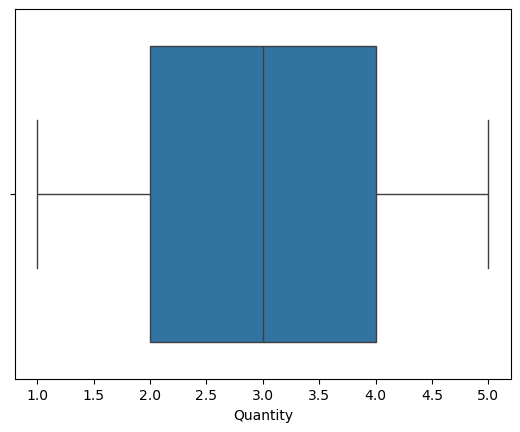

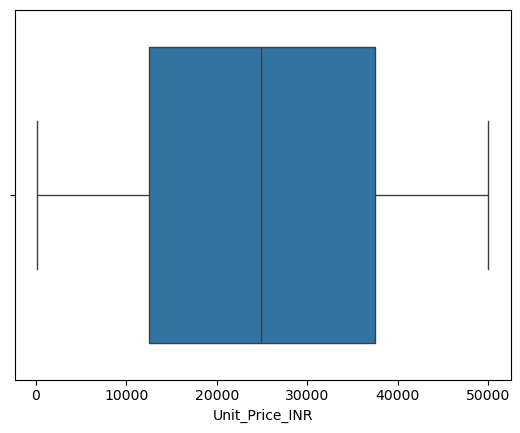

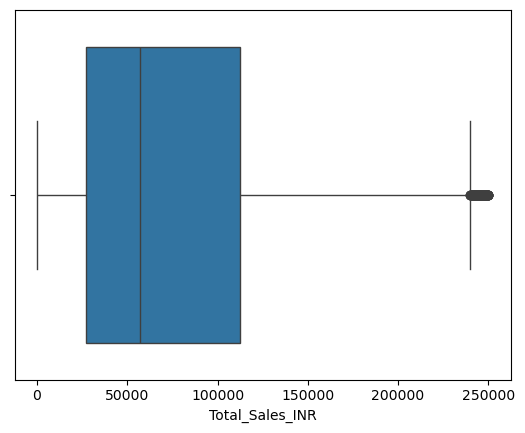

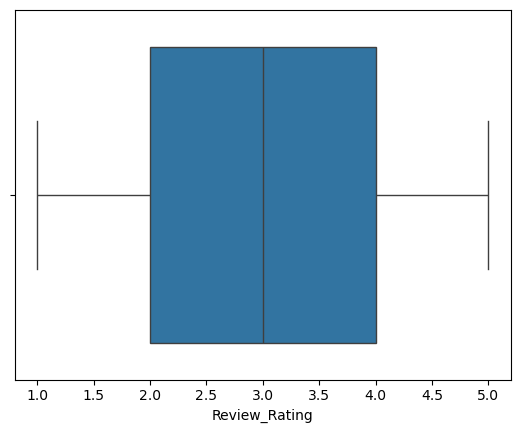

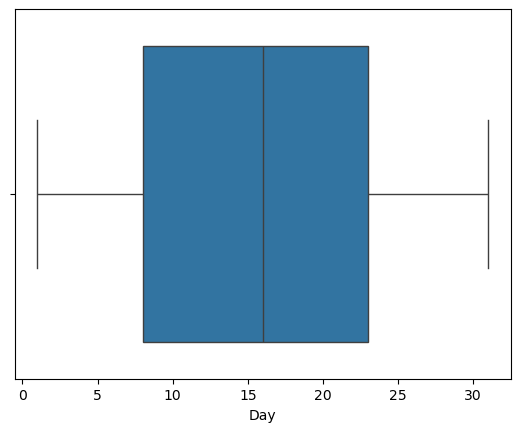

In [16]:
for i in (Amazon.select_dtypes(['int','float'])):
    sns.boxplot(x=i,data=Amazon)
    plt.show()

In [20]:
#IQR

In [17]:
outliers = []

for col in Amazon.select_dtypes(include=['int','float']):
    q1 = Amazon[col].quantile(0.25)
    q3 = Amazon[col].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    o = Amazon[(Amazon[col] < lower) | (Amazon[col] > upper)][col]

    print(f"Column: {col}")
    print(f"Outliers: {o.tolist()}\n")

    outliers.extend(o.tolist())

Column: Quantity
Outliers: []

Column: Unit_Price_INR
Outliers: []

Column: Total_Sales_INR
Outliers: [240671.05, 246125.5, 243688.95, 249318.95, 245795.8, 249272.6, 249747.75, 241273.5, 243924.65, 244415.15, 247329.4, 241953.15, 246817.7, 243082.45, 241343.65, 245086.35, 242637.25, 249200.75, 243921.95, 246301.6, 247229.45, 246212.7, 246583.75, 248733.55, 247259.0, 244464.55, 249955.5, 246377.95, 246904.0, 246007.55, 245814.55, 245525.35, 246405.6, 241116.6, 244747.6, 248194.95, 245834.9, 240951.65, 243039.95, 249587.25, 245493.3, 240110.4, 245439.45, 242182.75, 247009.55, 241211.1, 245828.4, 243424.65, 244238.25, 247526.4, 245166.15, 243345.7, 242538.05, 246237.65, 242008.35, 239888.55, 246950.9, 246736.9, 248823.85, 240388.25, 239993.2, 243361.45, 242837.1, 243314.4, 249598.8, 240330.25, 244240.05, 242122.45, 241375.95, 240073.6, 246994.0, 246435.5, 242735.05, 245535.3, 243120.95, 248213.0, 242557.85, 240751.95, 246473.25, 242485.45, 249601.8, 246126.45, 244292.75, 240218.65, 246754

In [18]:
Amazon.columns

Index(['Product_Category', 'Product_Name', 'Quantity', 'Unit_Price_INR',
       'Total_Sales_INR', 'Payment_Method', 'Delivery_Status', 'Review_Rating',
       'Review_Text', 'State', 'Day', 'Month'],
      dtype='object')

In [19]:
Amazon1=Amazon.groupby('Product_Name')['Total_Sales_INR'].sum().sort_values(ascending=False)
Amazon2=Amazon1.reset_index()

In [20]:
Amazon2

,Product_Name,Total_Sales_INR
0,Lipstick,48159020.15
1,Children's Book,48145664.52
2,Headphones,48044405.75
3,Hair Dryer,47428844.81
4,Perfume,46284732.62
5,Laptop,46173868.15
6,Tablet,46170022.15
7,Sneakers,46057295.93
8,Air Fryer,45919707.91
9,Jeans,45232819.47


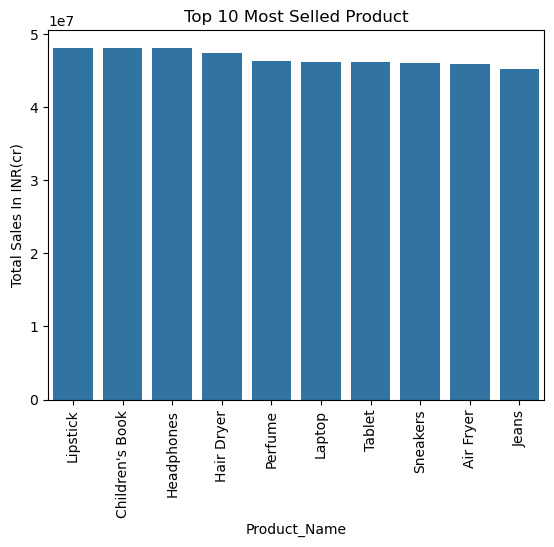

In [21]:
sns.barplot(x='Product_Name',y='Total_Sales_INR',data=Amazon2.head(10))
plt.title("Top 10 Most Selled Product")
plt.ylabel("Total Sales In INR(cr)")
plt.xticks(rotation=90)
plt.show()

In [22]:
Amazon.columns

Index(['Product_Category', 'Product_Name', 'Quantity', 'Unit_Price_INR',
       'Total_Sales_INR', 'Payment_Method', 'Delivery_Status', 'Review_Rating',
       'Review_Text', 'State', 'Day', 'Month'],
      dtype='object')

In [23]:
Amazon3=Amazon.groupby('Product_Category')['Total_Sales_INR'].sum().sort_values(ascending=False)
Amazon4=Amazon3.reset_index()


In [24]:
Amazon4

,Product_Category,Total_Sales_INR
0,Beauty,2.274896e+08
1,Electronics,2.265649e+08
2,Books,2.249992e+08
3,Clothing,2.224093e+08
4,Home & Kitchen,2.166987e+08


In [29]:
Amazon4['Total_Sales_Cr'] = Amazon4['Total_Sales_INR'] / 1e7

In [25]:
Amazon4

,Product_Category,Total_Sales_INR
0,Beauty,2.274896e+08
1,Electronics,2.265649e+08
2,Books,2.249992e+08
3,Clothing,2.224093e+08
4,Home & Kitchen,2.166987e+08


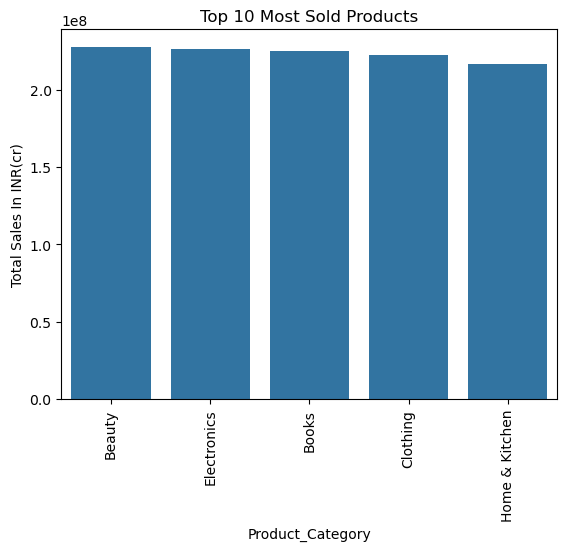

In [37]:
sns.barplot(x='Product_Category',y='Total_Sales_INR', data=Amazon4.head(10))
plt.title("Top 10 Most Sold Products")
plt.ylabel("Total Sales In INR(cr)")
plt.xticks(rotation=90)
plt.show()

In [38]:
Amazon.columns

Index(['Product_Category', 'Product_Name', 'Quantity', 'Unit_Price_INR',
       'Total_Sales_INR', 'Payment_Method', 'Delivery_Status', 'Review_Rating',
       'Review_Text', 'State', 'Day', 'Month'],
      dtype='object')

In [39]:
Amazon5=Amazon.groupby('Month')['Total_Sales_INR'].sum().sort_values(ascending=True)
Amazon6=Amazon5.reset_index()

In [40]:
Amazon6

,Month,Total_Sales_INR
0,February,84995760.62
1,June,89730685.72
2,September,91225555.74
3,April,91388990.14
4,January,92051785.03
5,March,93064349.39
6,October,93478344.05
7,November,94809186.29
8,July,95176904.42
9,May,97195848.48


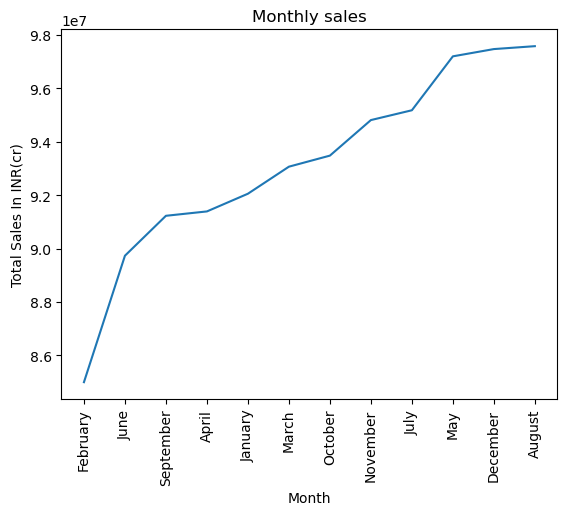

In [41]:
sns.lineplot(x='Month',y='Total_Sales_INR',data=Amazon6)
plt.title("Monthly sales")
plt.ylabel("Total Sales In INR(cr)")
plt.xticks(rotation=90)
plt.show()

In [42]:
Amazon7=Amazon.groupby('State')['Total_Sales_INR'].sum().sort_values(ascending=True)
Amazon8=Amazon7.reset_index()

In [43]:
Amazon8

,State,Total_Sales_INR
0,Gujarat,36226185.91
1,Andhra Pradesh,36237577.25
2,Uttarakhand,37633617.48
3,Himachal Pradesh,38182171.87
4,Karnataka,38444302.71
5,Mizoram,38641789.63
6,Nagaland,38670484.69
7,Maharashtra,38675511.58
8,Assam,38739460.17
9,Telangana,39077114.06


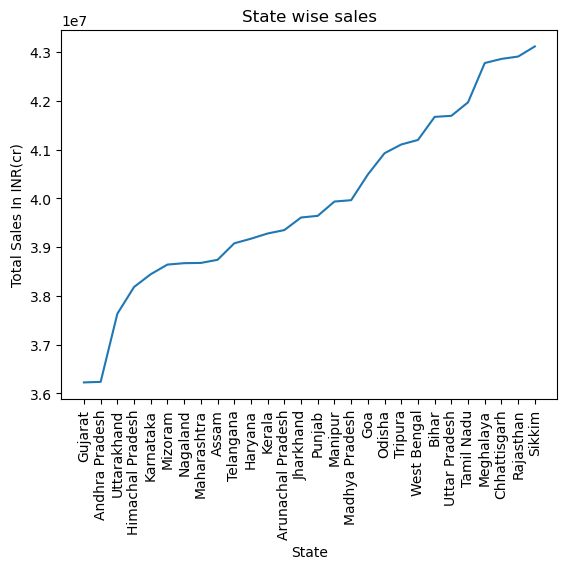

In [44]:
sns.lineplot(x='State',y='Total_Sales_INR',data=Amazon8)
plt.title("State wise sales")
plt.ylabel("Total Sales In INR(cr)")
plt.xticks(rotation=90)
plt.show()

In [45]:
Amazon

,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State,Day,Month
0,Home & Kitchen,Cookware Set,2,25574.41,51148.82,Credit Card,Returned,1,Waste of money,Sikkim,25,January
1,Beauty,Hair Dryer,1,19361.41,19361.41,Debit Card,Returned,5,Excellent product!,Telangana,28,August
2,Electronics,Tablet,3,38476.22,115428.66,Cash on Delivery,Delivered,3,Fair deal,Nagaland,27,February
3,Electronics,Headphones,5,38145.72,190728.60,Credit Card,Delivered,5,Highly recommend!,Assam,24,February
4,Clothing,Saree,5,45940.98,229704.90,UPI,Delivered,5,Highly recommend!,Odisha,15,June
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Beauty,Lipstick,4,36421.54,145686.16,UPI,Delivered,1,Never buying again,Gujarat,12,April
14996,Beauty,Shampoo,4,18158.02,72632.08,Debit Card,Delivered,4,Satisfied with the product,Meghalaya,29,August
14997,Books,Science Textbook,1,38864.05,38864.05,UPI,Delivered,1,Waste of money,Sikkim,27,January
14998,Beauty,Hair Dryer,3,32658.62,97975.86,Cash on Delivery,Pending,3,Okay product,Himachal Pradesh,21,June


<Axes: >

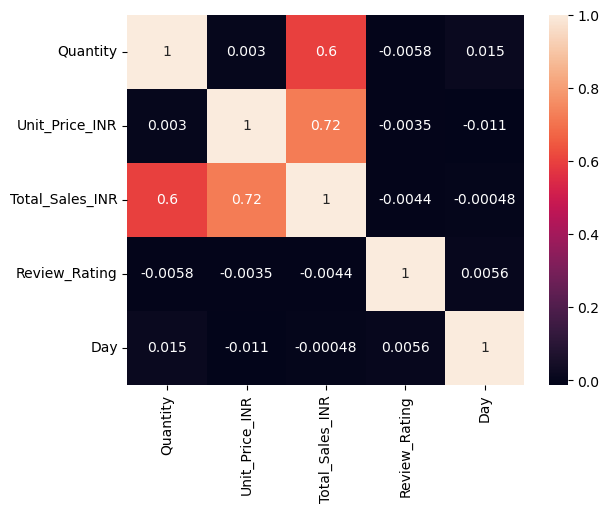

In [46]:
sns.heatmap(Amazon.corr(numeric_only=True),annot=True)

In [41]:
#Encoding

In [47]:
Amazon.dtypes

Product_Category     object
Product_Name         object
Quantity              int64
Unit_Price_INR      float64
Total_Sales_INR     float64
Payment_Method       object
Delivery_Status      object
Review_Rating         int64
Review_Text          object
State                object
Day                   int32
Month                object
dtype: object

In [48]:
Amazon.drop(columns=['Review_Text','State','Day','Month','Review_Rating'],axis=1,inplace=True)

In [49]:
Amazon.head()

,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status
0,Home & Kitchen,Cookware Set,2,25574.41,51148.82,Credit Card,Returned
1,Beauty,Hair Dryer,1,19361.41,19361.41,Debit Card,Returned
2,Electronics,Tablet,3,38476.22,115428.66,Cash on Delivery,Delivered
3,Electronics,Headphones,5,38145.72,190728.60,Credit Card,Delivered
4,Clothing,Saree,5,45940.98,229704.90,UPI,Delivered


In [50]:
col = ['Product_Category','Payment_Method','Delivery_Status']
Amazon = pd.get_dummies(Amazon, columns=col, drop_first=True, dtype=int)

In [51]:
Amazon

,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Product_Category_Books,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Home & Kitchen,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_UPI,Delivery_Status_Pending,Delivery_Status_Returned
0,Cookware Set,2,25574.41,51148.82,0,0,0,1,1,0,0,0,1
1,Hair Dryer,1,19361.41,19361.41,0,0,0,0,0,1,0,0,1
2,Tablet,3,38476.22,115428.66,0,0,1,0,0,0,0,0,0
3,Headphones,5,38145.72,190728.60,0,0,1,0,1,0,0,0,0
4,Saree,5,45940.98,229704.90,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Lipstick,4,36421.54,145686.16,0,0,0,0,0,0,1,0,0
14996,Shampoo,4,18158.02,72632.08,0,0,0,0,0,1,0,0,0
14997,Science Textbook,1,38864.05,38864.05,1,0,0,0,0,0,1,0,0
14998,Hair Dryer,3,32658.62,97975.86,0,0,0,0,0,0,0,1,0


In [52]:
!pip install category_encoders

In [53]:
from category_encoders import TargetEncoder

te = TargetEncoder()

Amazon['Product_Name'] = te.fit_transform(Amazon['Product_Name'], Amazon['Total_Sales_INR'])

In [54]:
Amazon

,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Product_Category_Books,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Home & Kitchen,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_UPI,Delivery_Status_Pending,Delivery_Status_Returned
0,76906.981768,2,25574.41,51148.82,0,0,0,1,1,0,0,0,1
1,79180.041419,1,19361.41,19361.41,0,0,0,0,0,1,0,0,1
2,74951.334659,3,38476.22,115428.66,0,0,1,0,0,0,0,0,0
3,78761.320902,5,38145.72,190728.60,0,0,1,0,1,0,0,0,0
4,72796.138712,5,45940.98,229704.90,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,81625.457881,4,36421.54,145686.16,0,0,0,0,0,0,1,0,0
14996,72303.437324,4,18158.02,72632.08,0,0,0,0,0,1,0,0,0
14997,69882.159808,1,38864.05,38864.05,1,0,0,0,0,0,1,0,0
14998,79180.041419,3,32658.62,97975.86,0,0,0,0,0,0,0,1,0


In [55]:
#Scaling

In [56]:
Amazon.columns

Index(['Product_Name', 'Quantity', 'Unit_Price_INR', 'Total_Sales_INR',
       'Product_Category_Books', 'Product_Category_Clothing',
       'Product_Category_Electronics', 'Product_Category_Home & Kitchen',
       'Payment_Method_Credit Card', 'Payment_Method_Debit Card',
       'Payment_Method_UPI', 'Delivery_Status_Pending',
       'Delivery_Status_Returned'],
      dtype='object')

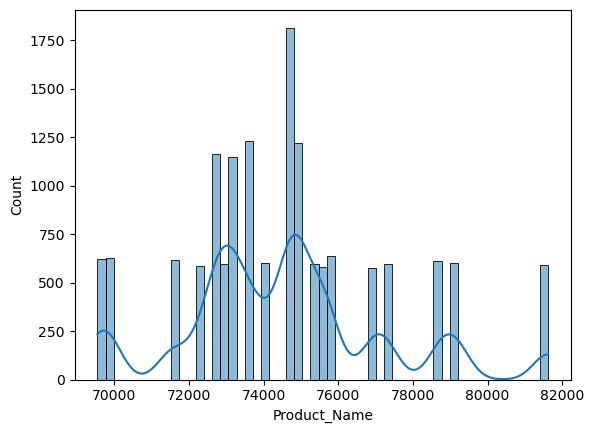

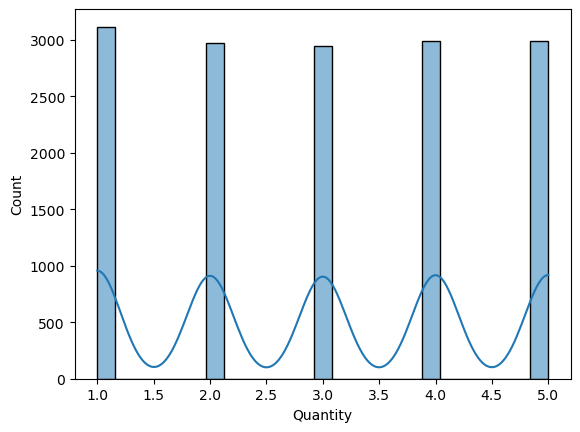

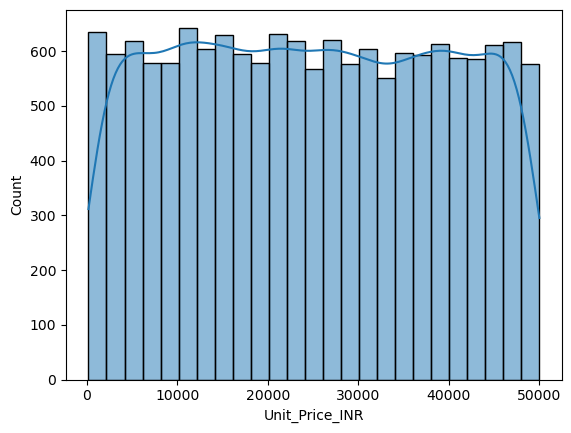

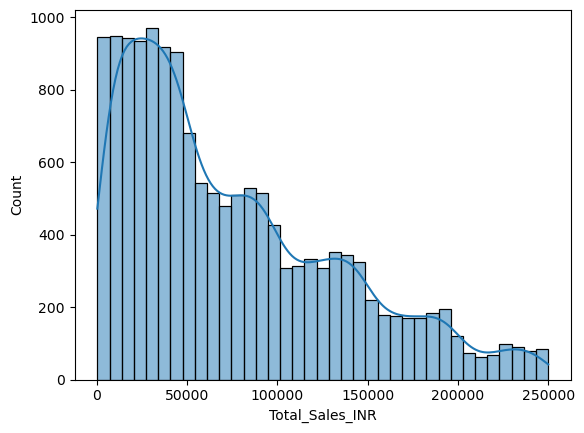

In [57]:
cols=['Product_Name','Quantity','Unit_Price_INR','Total_Sales_INR']
for i in cols:
    sns.histplot(x=i,data=Amazon,kde=True)
    plt.show()

In [58]:
from sklearn.preprocessing import MinMaxScaler

cols = ['Product_Name','Quantity','Unit_Price_INR','Total_Sales_INR']

scaler = MinMaxScaler()

Amazon[cols] = scaler.fit_transform(Amazon[cols])

In [59]:
Amazon

,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Product_Category_Books,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Home & Kitchen,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_UPI,Delivery_Status_Pending,Delivery_Status_Returned
0,0.609424,0.25,0.509558,0.203982,0,0,0,1,1,0,0,0,1
1,0.797578,0.00,0.384779,0.076706,0,0,0,0,0,1,0,0,1
2,0.447543,0.50,0.768673,0.461357,0,0,1,0,0,0,0,0,0
3,0.762918,1.00,0.762035,0.762857,0,0,1,0,1,0,0,0,0
4,0.269145,1.00,0.918592,0.918917,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1.000000,0.75,0.727407,0.582508,0,0,0,0,0,0,1,0,0
14996,0.228361,0.75,0.360610,0.290000,0,0,0,0,0,1,0,0,0
14997,0.027938,0.00,0.776462,0.154794,1,0,0,0,0,0,1,0,0
14998,0.797578,0.50,0.651834,0.391476,0,0,0,0,0,0,0,1,0
